In [2]:
# Wine Quality Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("WineQT.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
df = df.drop(columns=["Id"])

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


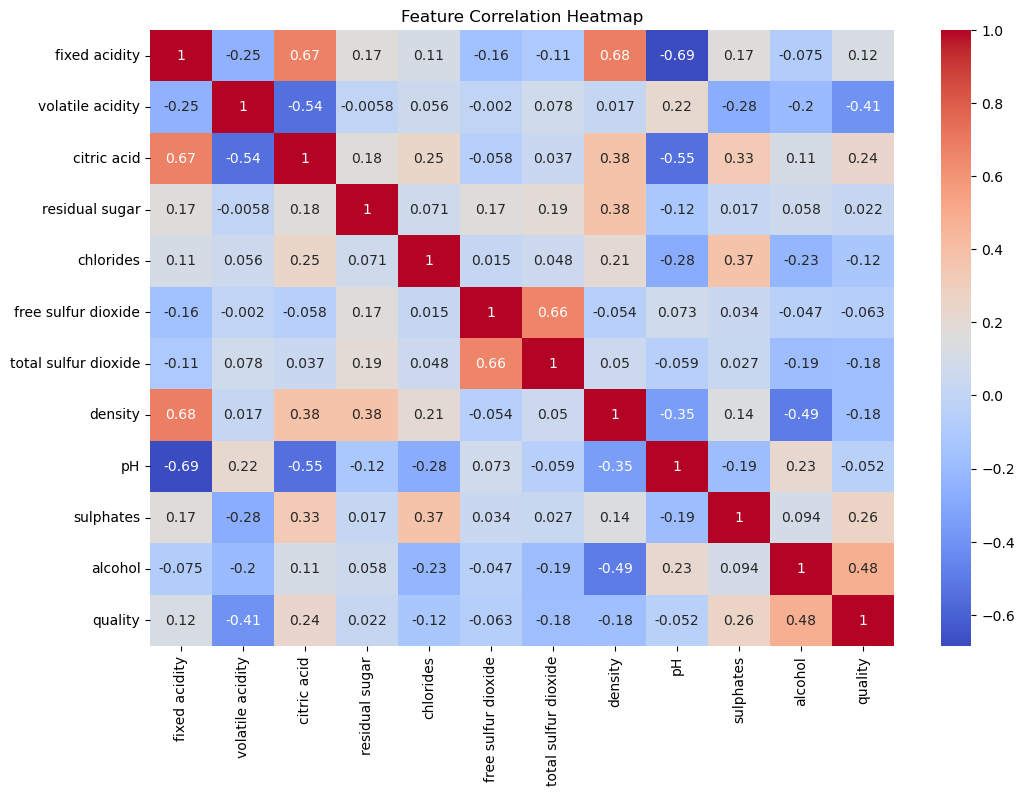

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.32
Mean Squared Error: 0.38


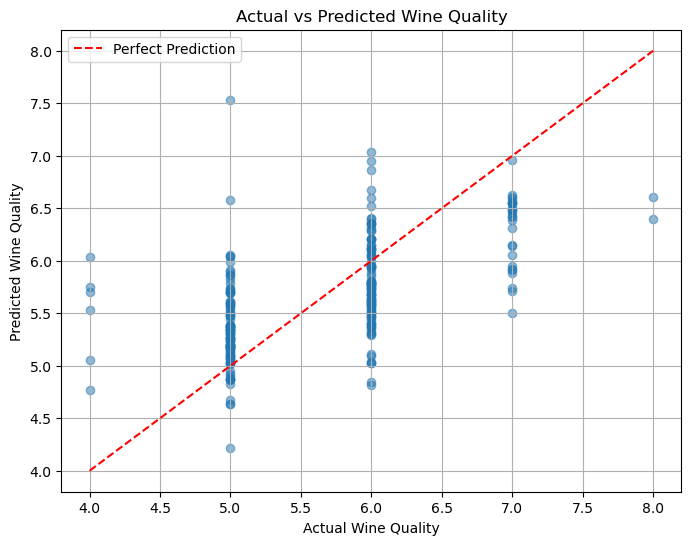

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#Experiment 2 - Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest R²: {r2_rf:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")


Random Forest R²: 0.47
Random Forest MSE: 0.30


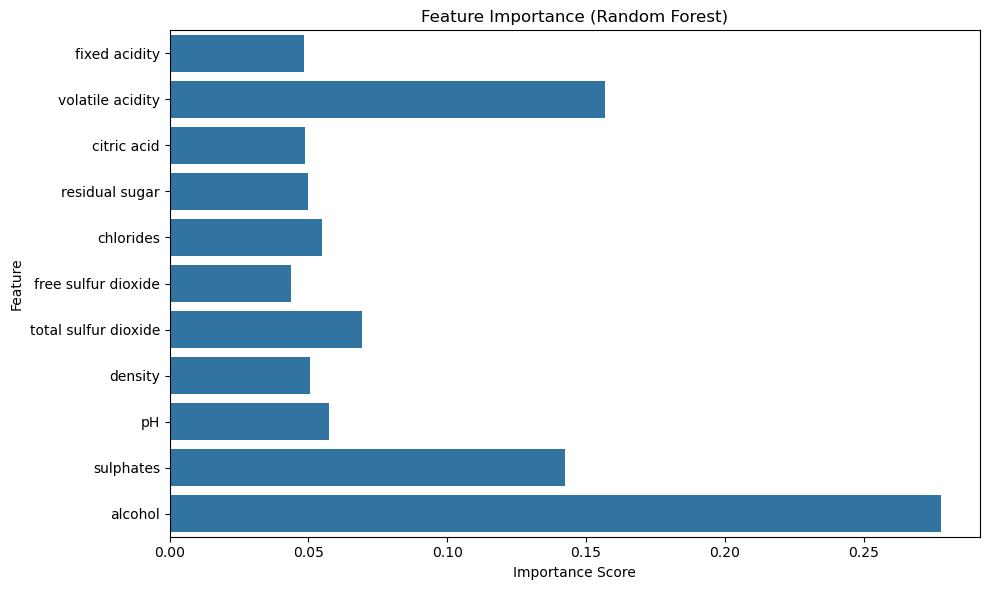

In [42]:
feature_importances = rf_model.feature_importances_
feature_names = df.drop("quality", axis=1).columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# Experiment 3: Top 3 Features

In [44]:
top_features = ['alcohol', 'volatile acidity', 'sulphates']
X_top = df[top_features]
y_top = df['quality']

In [46]:
scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)

In [48]:
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_scaled, y_top, test_size=0.2, random_state=42)

In [50]:
lr_top = LinearRegression()
lr_top.fit(X_train_top, y_train_top)
y_pred_lr_top = lr_top.predict(X_test_top)

In [52]:
r2_lr_top = r2_score(y_test_top, y_pred_lr_top)
mse_lr_top = mean_squared_error(y_test_top, y_pred_lr_top)
print(f"Linear Regression (Top Features) R²: {r2_lr_top:.2f}")
print(f"Linear Regression (Top Features) MSE: {mse_lr_top:.2f}")

Linear Regression (Top Features) R²: 0.32
Linear Regression (Top Features) MSE: 0.38


In [54]:
rf_top = RandomForestRegressor(random_state=42)
rf_top.fit(X_train_top, y_train_top)
y_pred_rf_top = rf_top.predict(X_test_top)

In [56]:
r2_rf_top = r2_score(y_test_top, y_pred_rf_top)
mse_rf_top = mean_squared_error(y_test_top, y_pred_rf_top)
print(f"Random Forest (Top Features) R²: {r2_rf_top:.2f}")
print(f"Random Forest (Top Features) MSE: {mse_rf_top:.2f}")

Random Forest (Top Features) R²: 0.35
Random Forest (Top Features) MSE: 0.36


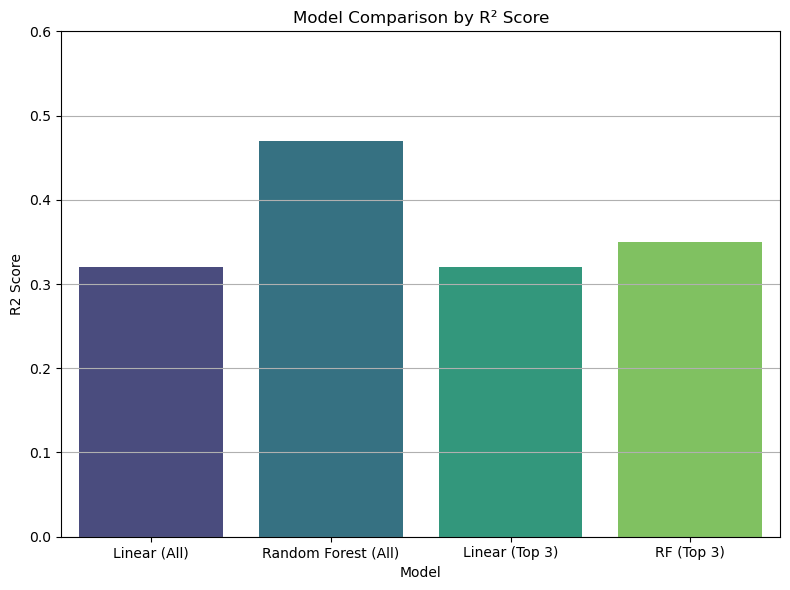

In [62]:
models = ["Linear (All)", "Random Forest (All)", "Linear (Top 3)", "RF (Top 3)"]
r2_scores = [0.32, 0.47, 0.32, 0.35]

df = pd.DataFrame({
    "Model": models,
    "R2 Score": r2_scores
})

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Model", y="R2 Score", hue="Model", palette="viridis", legend=False)
plt.title("Model Comparison by R² Score")
plt.ylim(0, 0.6)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

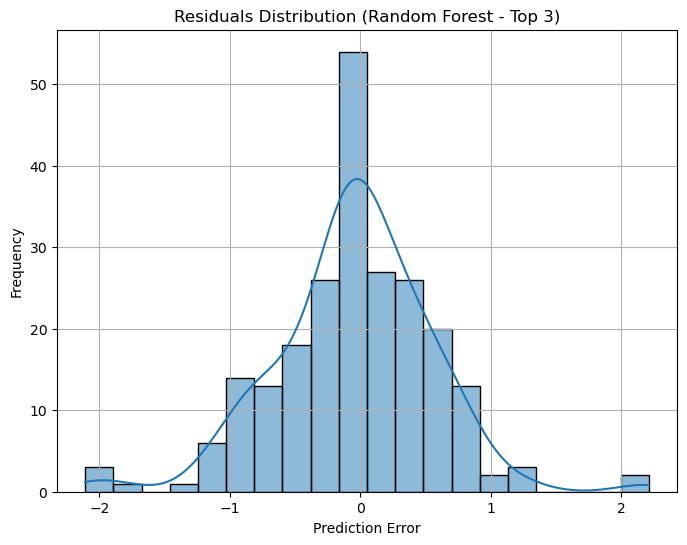

In [66]:
residuals = y_test_top - y_pred_rf_top

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residuals Distribution (Random Forest - Top 3)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
